Required libraries

In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torchvision.transforms as tt
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Look into the data directory

import os

DATA_DIR = './fruits/fruits-360'
print(os.listdir(DATA_DIR))

classes = os.listdir(DATA_DIR + "/Training")
print(classes)

['papers', 'LICENSE', 'test-multiple_fruits', 'Test', 'readme.md', 'Training']
['Potato Red', 'Peach 2', 'Cauliflower', 'Nut Forest', 'Grape White 2', 'Corn Husk', 'Avocado', 'Apple Red 1', 'Cucumber Ripe 2', 'Cocos', 'Strawberry', 'Physalis', 'Strawberry Wedge', 'Pomelo Sweetie', 'Apple Crimson Snow', 'Rambutan', 'Fig', 'Orange', 'Mulberry', 'Pepper Orange', 'Tangelo', 'Pear', 'Grape Blue', 'Cherry 2', 'Beetroot', 'Watermelon', 'Tomato 1', 'Apple Braeburn', 'Raspberry', 'Dates', 'Cactus fruit', 'Pepper Red', 'Banana Red', 'Kohlrabi', 'Grapefruit White', 'Lemon', 'Papaya', 'Lychee', 'Salak', 'Pear Kaiser', 'Walnut', 'Pepper Yellow', 'Redcurrant', 'Potato Sweet', 'Banana', 'Grapefruit Pink', 'Corn', 'Kaki', 'Peach Flat', 'Pear Forelle', 'Melon Piel de Sapo', 'Apricot', 'Granadilla', 'Tomato Cherry Red', 'Onion Red', 'Blueberry', 'Ginger Root', 'Kumquats', 'Apple Granny Smith', 'Banana Lady Finger', 'Mangostan', 'Guava', 'Carambula', 'Tomato 2', 'Pineapple', 'Grape White 4', 'Pear Abate'

In [6]:
# Count the images in each class of training dataset
data_dir = os.path.join(DATA_DIR, "Training")

for cls in os.listdir(data_dir):
    print(f"{cls} : {len(os.listdir(os.path.join(data_dir, cls)))}")

Potato Red : 450
Peach 2 : 738
Cauliflower : 702
Nut Forest : 654
Grape White 2 : 490
Corn Husk : 462
Avocado : 427
Apple Red 1 : 492
Cucumber Ripe 2 : 468
Cocos : 490
Strawberry : 492
Physalis : 492
Strawberry Wedge : 738
Pomelo Sweetie : 450
Apple Crimson Snow : 444
Rambutan : 492
Fig : 702
Orange : 479
Mulberry : 492
Pepper Orange : 702
Tangelo : 490
Pear : 492
Grape Blue : 984
Cherry 2 : 738
Beetroot : 450
Watermelon : 475
Tomato 1 : 738
Apple Braeburn : 492
Raspberry : 490
Dates : 490
Cactus fruit : 490
Pepper Red : 666
Banana Red : 490
Kohlrabi : 471
Grapefruit White : 492
Lemon : 492
Papaya : 492
Lychee : 490
Salak : 490
Pear Kaiser : 300
Walnut : 735
Pepper Yellow : 666
Redcurrant : 492
Potato Sweet : 450
Banana : 490
Grapefruit Pink : 490
Corn : 450
Kaki : 490
Peach Flat : 492
Pear Forelle : 702
Melon Piel de Sapo : 738
Apricot : 492
Granadilla : 490
Tomato Cherry Red : 492
Onion Red : 450
Blueberry : 462
Ginger Root : 297
Kumquats : 490
Apple Granny Smith : 492
Banana Lady Fi

In [7]:
dataset = ImageFolder(data_dir)


In [8]:
dataset[0]

(<PIL.Image.Image image mode=RGB size=100x100 at 0x7FC6018C3590>, 0)

In [9]:
dataset.classes

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [10]:
len(dataset)

67692

In [ ]:
# print an image and their label

0


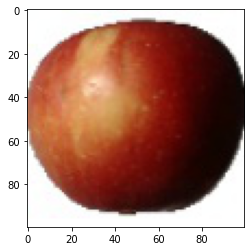

In [11]:

image, label = dataset[0]
print(label)
plt.imshow(image);

In [67]:
import torchvision.transforms as tt

In [ ]:
#Data transformation is done

In [85]:
stats = ((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
train_tfms = tt.Compose([tt.Resize(64),
                         tt.RandomCrop(64),
                         # tt.RandomHorizontalFlip(), 
                         # tt.RandomRotate
                         # tt.RandomResizedCrop(256, scale=(0.5,0.9), ratio=(1, 1)), 
                         # tt.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                         tt.ToTensor(), 
                         tt.Normalize(*stats,inplace=True)])
valid_tfms = tt.Compose([tt.ToTensor(), tt.Normalize(*stats)])

In [86]:
# PyTorch datasets
train_ds = ImageFolder(os.path.join(DATA_DIR, "Training"), train_tfms)
valid_ds = ImageFolder(os.path.join(DATA_DIR, "Test"), valid_tfms)

In [ ]:
# we pass data in batches. Batch size is kept as 28 because of the presence of more training samples and about 131 classes

In [87]:
batch_size = 128

In [88]:
# PyTorch data loaders
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=3, pin_memory=True)
valid_dl = DataLoader(valid_ds, batch_size*2, num_workers=3, pin_memory=True)

In [ ]:
# To display some sample images

In [89]:
def denormalize(images, means, stds):
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images, *stats)
        ax.imshow(make_grid(denorm_images[:64], nrow=8).permute(1, 2, 0).clamp(0,1))
        break

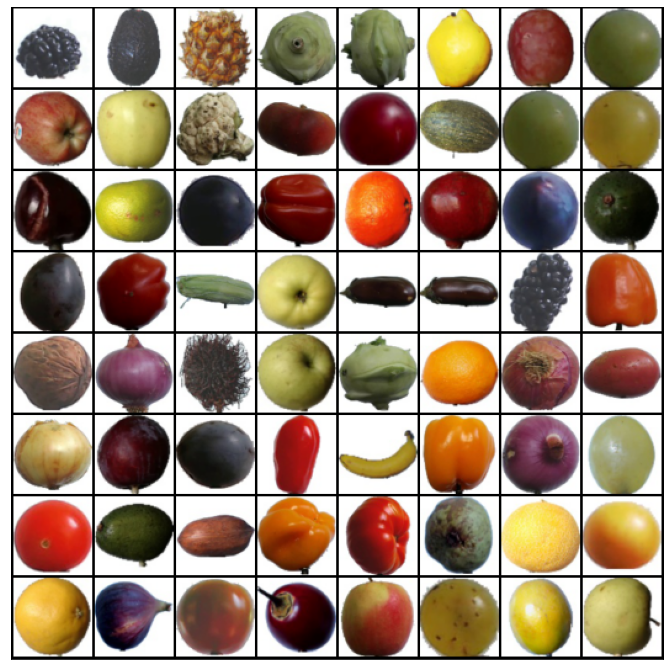

In [90]:
show_batch(train_dl)

In [92]:
targets = dataset.classes
num_classes = len(dataset.classes)
num_classes

131

In [ ]:
#We define a couple of helper functions (`get_default_device` & `to_device`) and a helper class `DeviceDataLoader` to move our model & data to the GPU as required.

In [93]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
#Default device in use

In [ ]:
device = get_default_device()

In [ ]:
#We can now wrap our training and validation data loaders using DeviceDataLoader

In [95]:
train_dl = DeviceDataLoader(train_dl, device)
valid_dl = DeviceDataLoader(valid_dl, device)

In [ ]:
#We define few functions to calculate accuracy and implements loss function to calculate the training and validation loss of the model.

In [96]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                 
        loss = F.cross_entropy(out, labels)
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

In [ ]:
# Buildig our NN

In [97]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, num_classes):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64) 
        self.conv2 = conv_block(64, 128, pool=True) 
        self.res1 = nn.Sequential(conv_block(128, 128), 
                                  conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True) 
        self.conv4 = conv_block(256, 512, pool=True) 

        self.res2 = nn.Sequential(conv_block(512, 512), 
                                  conv_block(512, 512)) 
        
        self.classifier = nn.Sequential(nn.AdaptiveMaxPool2d(1), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, num_classes))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
# We use ResNet9 pretrained model; the following is its architecture

In [98]:
model = to_device(ResNet9(3, num_classes), device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [ ]:
# We train our model

In [ ]:
# No grad means It means any tensor with gradient currently attached with the current computational graph is now detached from the current graph

In [ ]:
#Optimization 

In [103]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Recording and updating learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [104]:
history = [evaluate(model, valid_dl)]
history

[{'val_loss': 4.875436305999756, 'val_acc': 0.008383075706660748}]

In [ ]:
#We use Adam's optimizer here as it is optimal and widely preffered 

In [ ]:
#Learning rate is specfied which controls how quickly our model is able to adapt to the problem

In [ ]:
#Eopch number as 5 indicating 5 passes

In [105]:
epochs = 5
max_lr = 0.001
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [106]:
%%time
history += fit_one_cycle(epochs, max_lr, model, train_dl, valid_dl, 
                             grad_clip=grad_clip, 
                             weight_decay=weight_decay, 
                             opt_func=opt_func)

Epoch [0], last_lr: 0.00076, train_loss: 0.6623, val_loss: 0.3698, val_acc: 0.8881
Epoch [1], last_lr: 0.00095, train_loss: 0.0661, val_loss: 0.5628, val_acc: 0.8333
Epoch [2], last_lr: 0.00061, train_loss: 0.0055, val_loss: 0.0621, val_acc: 0.9863
Epoch [3], last_lr: 0.00019, train_loss: 0.0017, val_loss: 0.0411, val_acc: 0.9864
Epoch [4], last_lr: 0.00000, train_loss: 0.0003, val_loss: 0.0332, val_acc: 0.9885
CPU times: user 4min 14s, sys: 2min 1s, total: 6min 15s
Wall time: 8min 22s


In [ ]:
#Plotting the valdation set accuracies to study how the model improves over time.

In [108]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

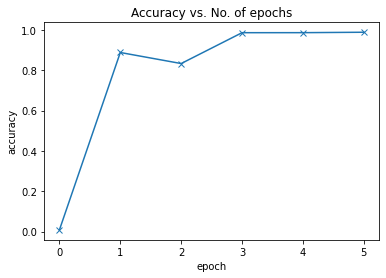

In [109]:
plot_accuracies(history)

In [ ]:
#Plotting the training and validation losses

In [110]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

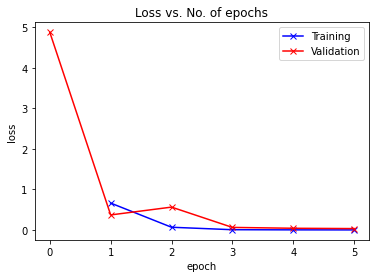

In [111]:
plot_losses(history)

It's clear from the trend that our model isn't overfitting to the training data.